# Neural Network Demo

This notebook demonstrates the implementation and usage of our Neural Network algorithm on different tasks.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris, load_breast_cancer, make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neural_network import MLPClassifier

# Import our implementation
from neural_network import NeuralNetwork

## 1. Binary Classification: Breast Cancer Dataset

Let's start with a binary classification task using the breast cancer dataset.

In [2]:
# Load breast cancer dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

print(f"Dataset shape: {X.shape}")
print(f"Number of features: {X.shape[1]}")
print(f"Number of classes: {len(np.unique(y))}")
print(f"Class distribution: {np.bincount(y)}")

Dataset shape: (569, 30)
Number of features: 30
Number of classes: 2
Class distribution: [212 357]


### Prepare the Data

In [3]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Train Our Neural Network Model

In [4]:
# Initialize and train our neural network
our_nn = NeuralNetwork(
    layer_sizes=[X_train.shape[1], 16, 8, 1],  # Input, hidden layers, output
    learning_rate=0.01,
    n_iterations=1000,
    activation='relu',
    batch_size=32,
    lambda_param=0.001,
    random_state=42
)

# Train with verbose output
our_nn.fit(X_train_scaled, y_train, verbose=True)

# Make predictions
our_predictions = our_nn.predict(X_test_scaled)
our_accuracy = accuracy_score(y_test, our_predictions)

print(f"\nOur Neural Network Accuracy: {our_accuracy:.4f}")

Epoch 0/1000, Cost: 0.6276
Epoch 100/1000, Cost: 0.0598
Epoch 200/1000, Cost: 0.0370
Epoch 300/1000, Cost: 0.0249
Epoch 400/1000, Cost: 0.0173
Epoch 500/1000, Cost: 0.0129
Epoch 600/1000, Cost: 0.0100
Epoch 700/1000, Cost: 0.0079
Epoch 800/1000, Cost: 0.0065
Epoch 900/1000, Cost: 0.0055

Our Neural Network Accuracy: 0.9825


### Compare with scikit-learn's MLPClassifier

In [5]:
# Train scikit-learn's MLPClassifier
sklearn_nn = MLPClassifier(
    hidden_layer_sizes=(16, 8),
    activation='relu',
    learning_rate_init=0.01,
    max_iter=1000,
    alpha=0.001,  # L2 regularization parameter
    batch_size=32,
    random_state=42
)
sklearn_nn.fit(X_train_scaled, y_train)

# Make predictions
sklearn_predictions = sklearn_nn.predict(X_test_scaled)
sklearn_accuracy = accuracy_score(y_test, sklearn_predictions)

print(f"scikit-learn Neural Network Accuracy: {sklearn_accuracy:.4f}")

scikit-learn Neural Network Accuracy: 0.9649


### Visualize Results

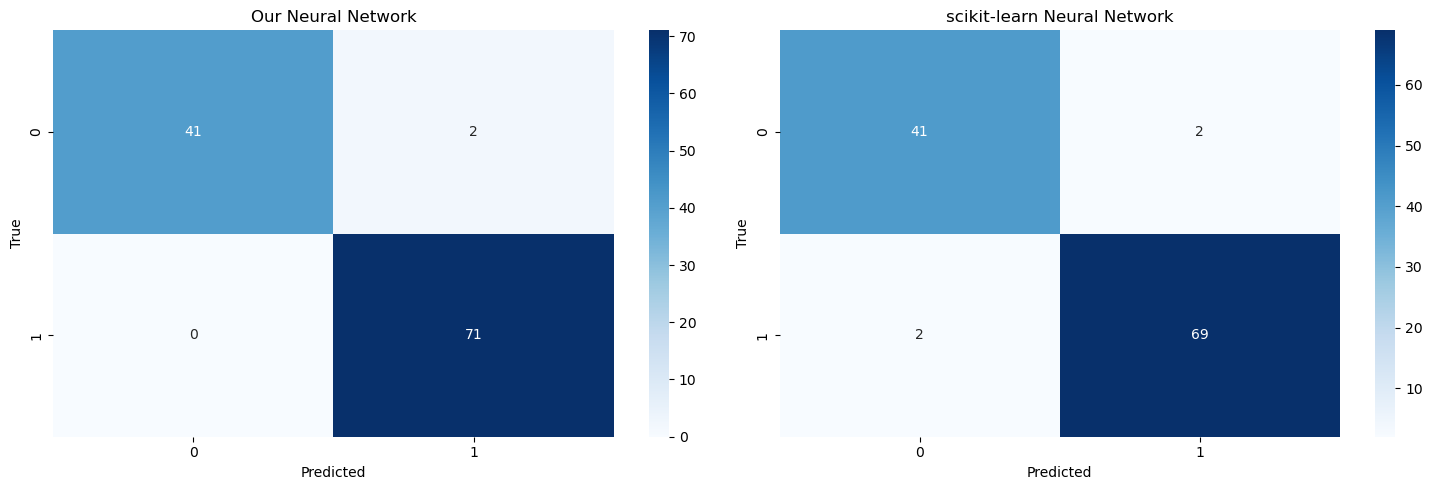

In [6]:
# Plot confusion matrices
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Our implementation
cm_our = confusion_matrix(y_test, our_predictions)
sns.heatmap(cm_our, annot=True, fmt='d', ax=ax1, cmap='Blues')
ax1.set_title('Our Neural Network')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('True')

# scikit-learn implementation
cm_sklearn = confusion_matrix(y_test, sklearn_predictions)
sns.heatmap(cm_sklearn, annot=True, fmt='d', ax=ax2, cmap='Blues')
ax2.set_title('scikit-learn Neural Network')
ax2.set_xlabel('Predicted')
ax2.set_ylabel('True')

plt.tight_layout()
plt.show()

## 2. Multi-class Classification: Iris Dataset

Now let's test our neural network on a multi-class classification problem using the Iris dataset.

In [7]:
# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

print(f"Dataset shape: {X.shape}")
print(f"Number of features: {X.shape[1]}")
print(f"Number of classes: {len(np.unique(y))}")
print(f"Class distribution: {np.bincount(y)}")

Dataset shape: (150, 4)
Number of features: 4
Number of classes: 3
Class distribution: [50 50 50]


### Prepare the Data

In [8]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Train Neural Network for Multi-class Classification

In [9]:
# Initialize and train our neural network
our_nn = NeuralNetwork(
    layer_sizes=[X_train.shape[1], 10, 3],  # Output layer with 3 neurons for 3 classes
    learning_rate=0.01,
    n_iterations=2000,
    activation='relu',
    batch_size=16,
    lambda_param=0.0001,
    random_state=42
)

# Train with verbose output
our_nn.fit(X_train_scaled, y_train, verbose=True)

# Make predictions
our_predictions = our_nn.predict(X_test_scaled)
our_accuracy = accuracy_score(y_test, our_predictions)

print(f"\nOur Neural Network Accuracy on Iris: {our_accuracy:.4f}")

Epoch 0/2000, Cost: 0.9233
Epoch 200/2000, Cost: 0.1544
Epoch 400/2000, Cost: 0.0923
Epoch 600/2000, Cost: 0.0719
Epoch 800/2000, Cost: 0.0625
Epoch 1000/2000, Cost: 0.0570
Epoch 1200/2000, Cost: 0.0535
Epoch 1400/2000, Cost: 0.0512
Epoch 1600/2000, Cost: 0.0495
Epoch 1800/2000, Cost: 0.0482

Our Neural Network Accuracy on Iris: 1.0000


### Compare with scikit-learn's Implementation

In [10]:
# Train scikit-learn's MLPClassifier
sklearn_nn = MLPClassifier(
    hidden_layer_sizes=(10,),
    activation='relu',
    learning_rate_init=0.01,
    max_iter=2000,
    alpha=0.0001,
    batch_size=16,
    random_state=42
)
sklearn_nn.fit(X_train_scaled, y_train)

# Make predictions
sklearn_predictions = sklearn_nn.predict(X_test_scaled)
sklearn_accuracy = accuracy_score(y_test, sklearn_predictions)

print(f"scikit-learn Neural Network Accuracy on Iris: {sklearn_accuracy:.4f}")

scikit-learn Neural Network Accuracy on Iris: 1.0000


### Visualize Multi-class Results

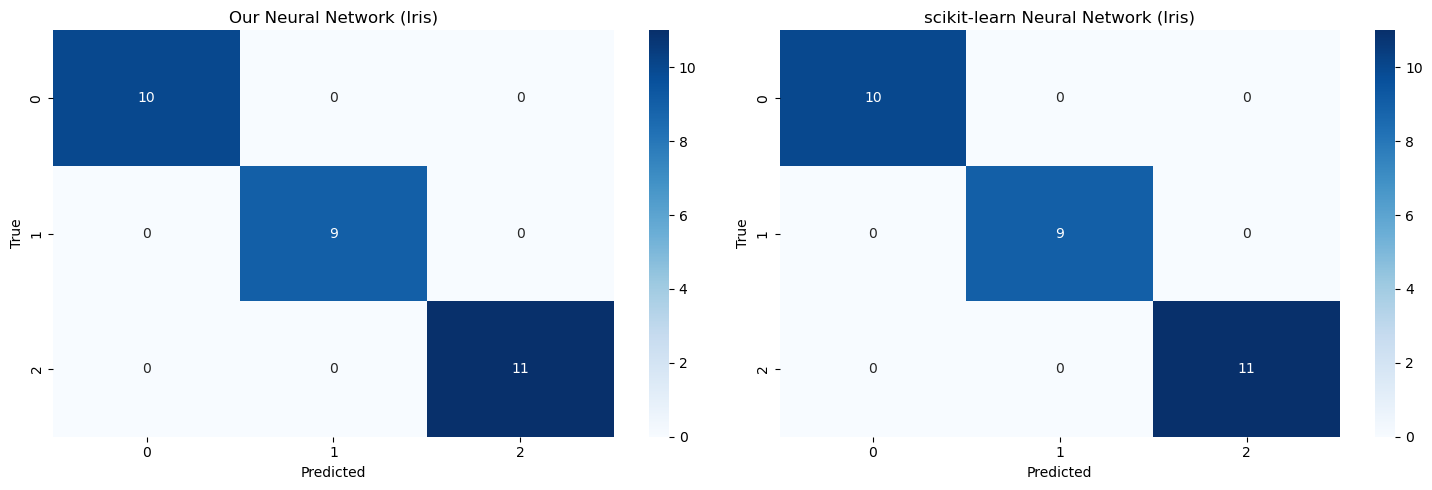

In [11]:
# Plot confusion matrices
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Our implementation
cm_our = confusion_matrix(y_test, our_predictions)
sns.heatmap(cm_our, annot=True, fmt='d', ax=ax1, cmap='Blues')
ax1.set_title('Our Neural Network (Iris)')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('True')

# scikit-learn implementation
cm_sklearn = confusion_matrix(y_test, sklearn_predictions)
sns.heatmap(cm_sklearn, annot=True, fmt='d', ax=ax2, cmap='Blues')
ax2.set_title('scikit-learn Neural Network (Iris)')
ax2.set_xlabel('Predicted')
ax2.set_ylabel('True')

plt.tight_layout()
plt.show()

## 3. Non-linear Decision Boundaries: Moons Dataset

Let's visualize how our neural network handles non-linear decision boundaries using the moons dataset.

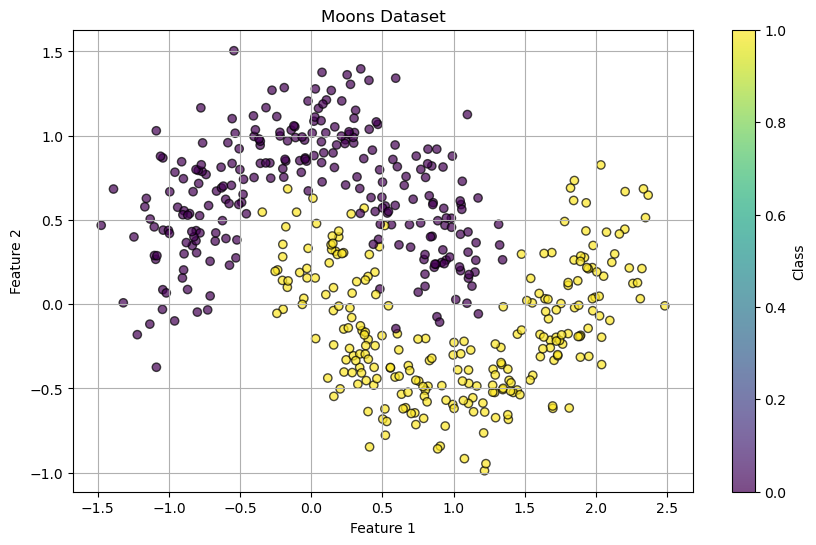

In [12]:
# Generate the moons dataset
X_moons, y_moons = make_moons(n_samples=500, noise=0.2, random_state=42)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_moons, y_moons, test_size=0.2, random_state=42
)

# Plot the dataset
plt.figure(figsize=(10, 6))
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=y_moons, cmap='viridis', edgecolors='k', alpha=0.7)
plt.title('Moons Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.colorbar(label='Class')
plt.show()

### Train Neural Network on Moons Dataset

In [13]:
# Initialize and train our neural network
our_nn = NeuralNetwork(
    layer_sizes=[2, 16, 8, 1],  # Input: 2 features, Output: 1 (binary)
    learning_rate=0.01,
    n_iterations=2000,
    activation='relu',
    batch_size=32,
    lambda_param=0.0001,
    random_state=42
)

# Train with verbose output
our_nn.fit(X_train, y_train, verbose=True)

# Make predictions
our_predictions = our_nn.predict(X_test)
our_accuracy = accuracy_score(y_test, our_predictions)

print(f"\nOur Neural Network Accuracy on Moons: {our_accuracy:.4f}")

Epoch 0/2000, Cost: 1.0492
Epoch 200/2000, Cost: 0.2578
Epoch 400/2000, Cost: 0.2097
Epoch 600/2000, Cost: 0.1516
Epoch 800/2000, Cost: 0.0969
Epoch 1000/2000, Cost: 0.0674
Epoch 1200/2000, Cost: 0.0540
Epoch 1400/2000, Cost: 0.0469
Epoch 1600/2000, Cost: 0.0423
Epoch 1800/2000, Cost: 0.0393

Our Neural Network Accuracy on Moons: 0.9800


### Visualize Decision Boundary

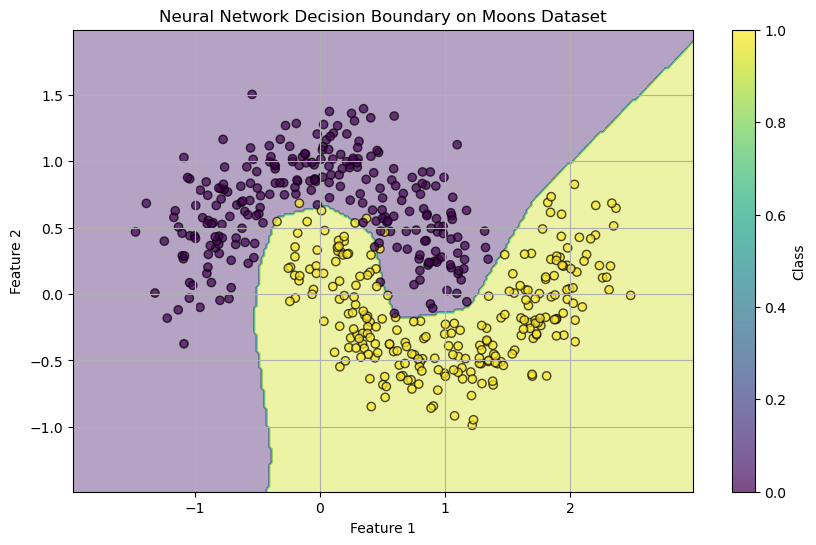

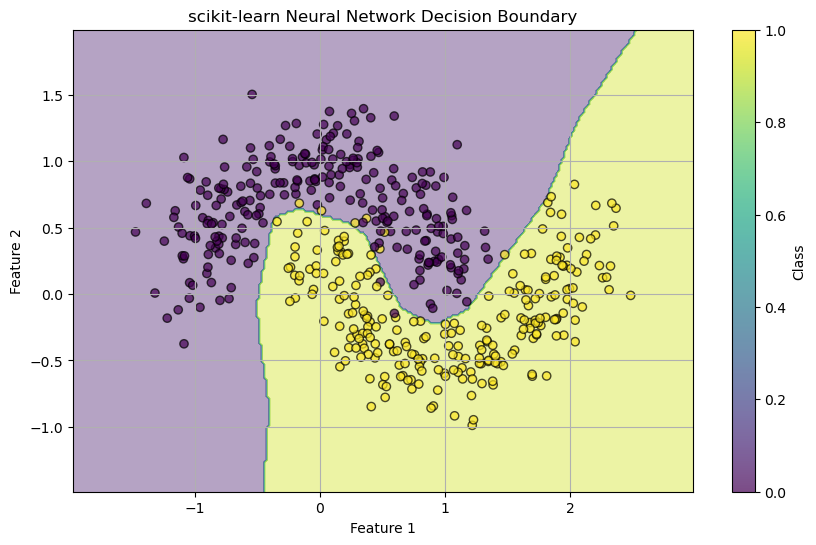

In [14]:
def plot_decision_boundary(model, X, y, title):
    # Create a mesh grid
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    # Make predictions on mesh grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='viridis')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k', alpha=0.7)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.grid(True)
    plt.colorbar(label='Class')
    plt.show()

# Plot decision boundary
plot_decision_boundary(our_nn, X_moons, y_moons, 'Neural Network Decision Boundary on Moons Dataset')

# Compare with scikit-learn
sklearn_nn = MLPClassifier(
    hidden_layer_sizes=(16, 8),
    activation='relu',
    learning_rate_init=0.01,
    max_iter=2000,
    alpha=0.0001,
    batch_size=32,
    random_state=42
)
sklearn_nn.fit(X_train, y_train)
plot_decision_boundary(sklearn_nn, X_moons, y_moons, 'scikit-learn Neural Network Decision Boundary')

## 4. Effect of Different Network Architectures

Let's examine how different network architectures affect performance.

Architecture: 2-4-1
Number of parameters: 17
Train accuracy: 0.8650
Test accuracy: 0.8600
-----------------------------
Architecture: 2-8-1
Number of parameters: 33
Train accuracy: 0.8875
Test accuracy: 0.8600
-----------------------------
Architecture: 2-16-8-1
Number of parameters: 193
Train accuracy: 0.9800
Test accuracy: 0.9800
-----------------------------
Architecture: 2-32-16-1
Number of parameters: 641
Train accuracy: 0.9850
Test accuracy: 0.9700
-----------------------------


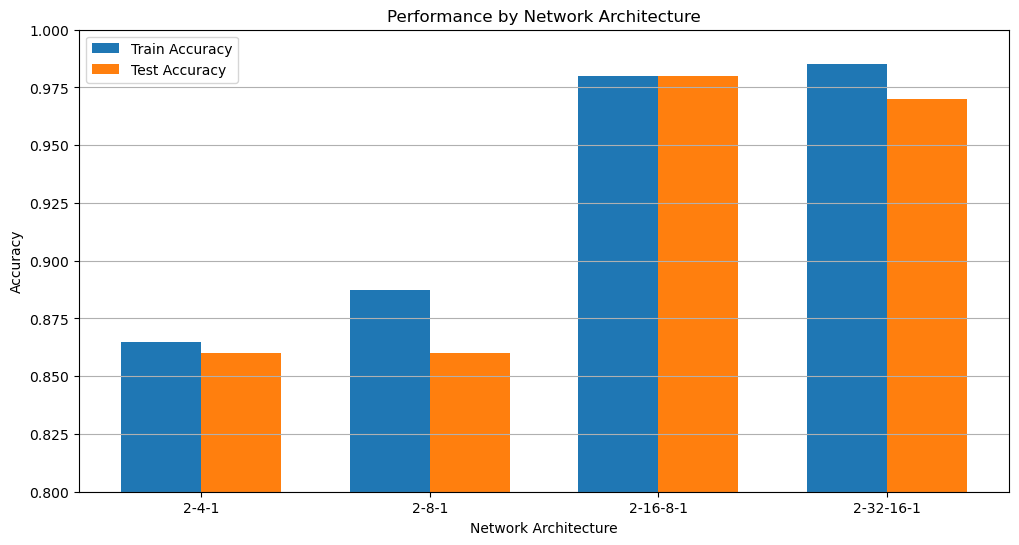

In [15]:
# Test different network architectures
architectures = [
    [2, 4, 1],        # Small network (1 hidden layer)
    [2, 8, 1],        # Medium network (1 hidden layer)
    [2, 16, 8, 1],    # Medium network (2 hidden layers)
    [2, 32, 16, 1]    # Large network (2 hidden layers)
]

results = []

for arch in architectures:
    # Initialize and train neural network
    nn = NeuralNetwork(
        layer_sizes=arch,
        learning_rate=0.01,
        n_iterations=1000,
        activation='relu',
        batch_size=32,
        random_state=42
    )
    
    nn.fit(X_train, y_train)
    
    # Evaluate
    train_acc = accuracy_score(y_train, nn.predict(X_train))
    test_acc = accuracy_score(y_test, nn.predict(X_test))
    
    arch_str = '-'.join(str(x) for x in arch)
    results.append({
        'Architecture': arch_str,
        'Params': sum(arch[i] * arch[i+1] for i in range(len(arch)-1)) + sum(arch[1:]),  # weights + biases
        'Train Accuracy': train_acc,
        'Test Accuracy': test_acc
    })
    
    print(f"Architecture: {arch_str}")
    print(f"Number of parameters: {results[-1]['Params']}")
    print(f"Train accuracy: {train_acc:.4f}")
    print(f"Test accuracy: {test_acc:.4f}")
    print("-----------------------------")

# Plot results
plt.figure(figsize=(12, 6))
architectures_str = [r['Architecture'] for r in results]
train_acc = [r['Train Accuracy'] for r in results]
test_acc = [r['Test Accuracy'] for r in results]

x = np.arange(len(architectures_str))
width = 0.35

plt.bar(x - width/2, train_acc, width, label='Train Accuracy')
plt.bar(x + width/2, test_acc, width, label='Test Accuracy')

plt.xlabel('Network Architecture')
plt.ylabel('Accuracy')
plt.title('Performance by Network Architecture')
plt.xticks(x, architectures_str)
plt.ylim(0.8, 1.0)
plt.legend()
plt.grid(True, axis='y')
plt.show()

## 5. Effect of Different Activation Functions

Let's compare how different activation functions affect our network's performance.

Activation: sigmoid
Train accuracy: 0.8575
Test accuracy: 0.8600


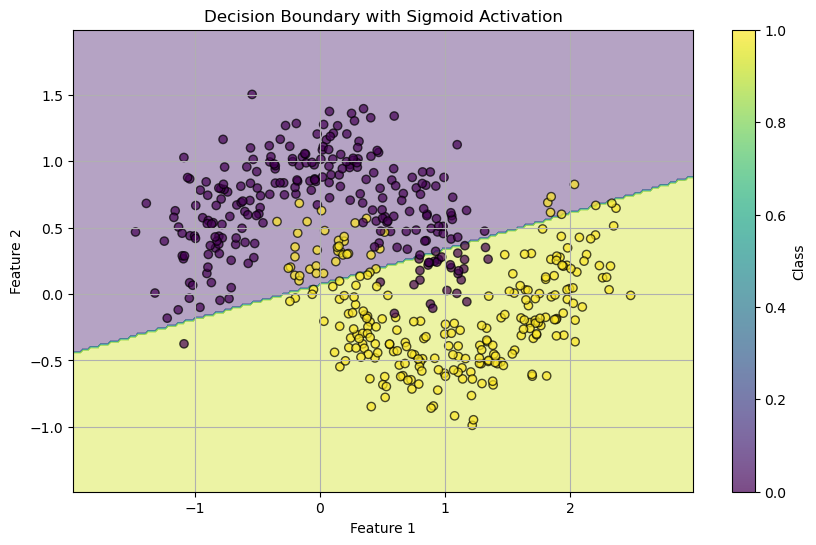

Activation: tanh
Train accuracy: 0.9800
Test accuracy: 0.9900


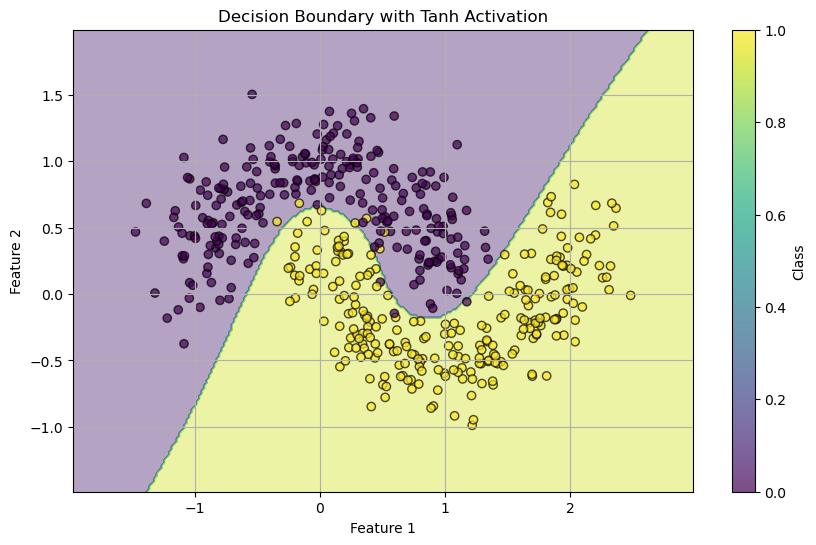

Activation: relu
Train accuracy: 0.9800
Test accuracy: 0.9800


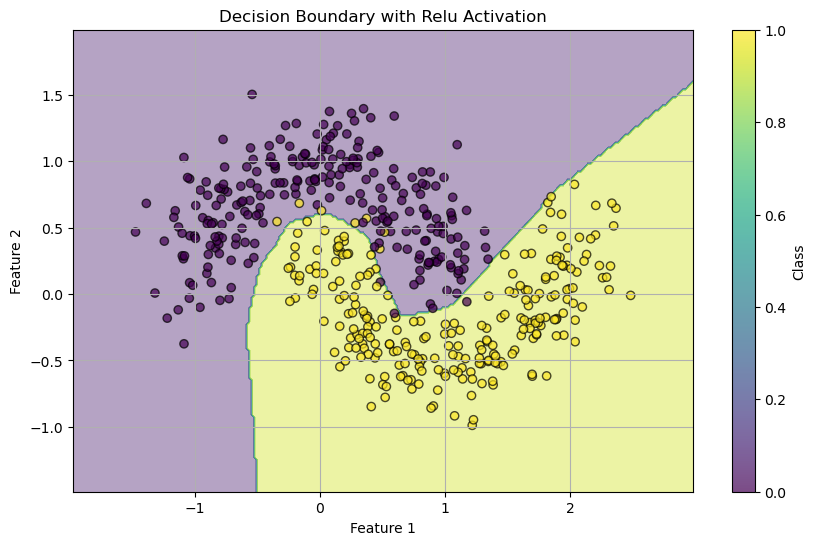

In [16]:
# Test different activation functions
activations = ['sigmoid', 'tanh', 'relu']
act_results = []

for act in activations:
    # Initialize and train neural network
    nn = NeuralNetwork(
        layer_sizes=[2, 16, 8, 1],
        learning_rate=0.01,
        n_iterations=1000,
        activation=act,
        batch_size=32,
        random_state=42
    )
    
    nn.fit(X_train, y_train)
    
    # Evaluate
    train_acc = accuracy_score(y_train, nn.predict(X_train))
    test_acc = accuracy_score(y_test, nn.predict(X_test))
    
    act_results.append({
        'Activation': act,
        'Train Accuracy': train_acc,
        'Test Accuracy': test_acc
    })
    
    print(f"Activation: {act}")
    print(f"Train accuracy: {train_acc:.4f}")
    print(f"Test accuracy: {test_acc:.4f}")
    
    # Plot decision boundary
    plot_decision_boundary(nn, X_moons, y_moons, f'Decision Boundary with {act.capitalize()} Activation')

## 6. Exploring Regularization Effects

Let's see how different regularization strengths affect the model.

Lambda: 0
Train accuracy: 0.9900
Test accuracy: 0.9700
-----------------------------
Lambda: 0.0001
Train accuracy: 0.9900
Test accuracy: 0.9700
-----------------------------
Lambda: 0.001
Train accuracy: 0.9900
Test accuracy: 0.9700
-----------------------------
Lambda: 0.01
Train accuracy: 0.9850
Test accuracy: 0.9700
-----------------------------
Lambda: 0.1
Train accuracy: 0.9825
Test accuracy: 0.9800
-----------------------------


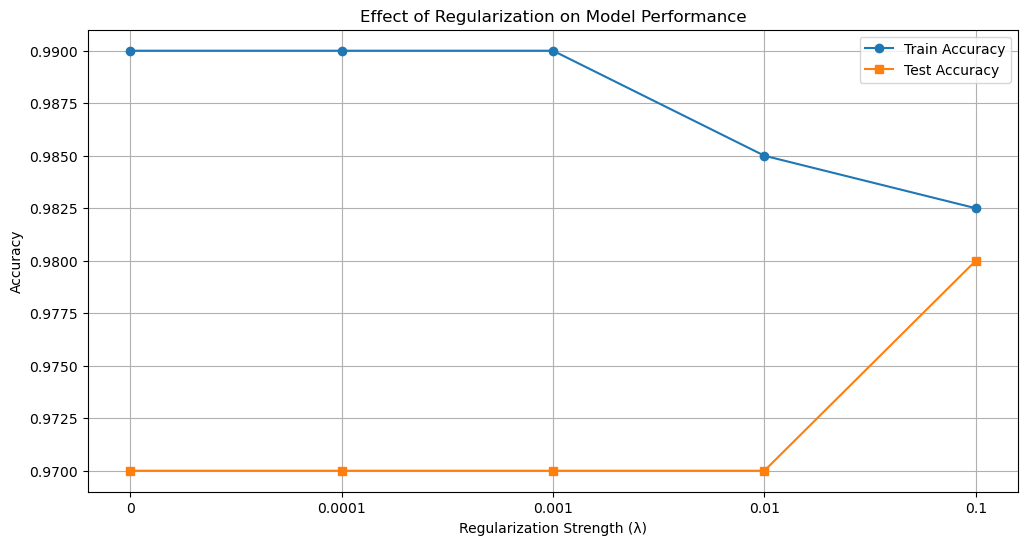

In [17]:
# Test different regularization strengths
lambda_values = [0, 0.0001, 0.001, 0.01, 0.1]
reg_results = []

for lambda_val in lambda_values:
    # Initialize and train neural network
    nn = NeuralNetwork(
        layer_sizes=[2, 32, 16, 1],  # Intentionally larger network to show regularization effects
        learning_rate=0.01,
        n_iterations=1500,
        activation='relu',
        batch_size=32,
        lambda_param=lambda_val,
        random_state=42
    )
    
    nn.fit(X_train, y_train)
    
    # Evaluate
    train_acc = accuracy_score(y_train, nn.predict(X_train))
    test_acc = accuracy_score(y_test, nn.predict(X_test))
    
    reg_results.append({
        'Lambda': lambda_val,
        'Train Accuracy': train_acc,
        'Test Accuracy': test_acc
    })
    
    print(f"Lambda: {lambda_val}")
    print(f"Train accuracy: {train_acc:.4f}")
    print(f"Test accuracy: {test_acc:.4f}")
    print("-----------------------------")

# Plot results
plt.figure(figsize=(12, 6))
lambda_str = [str(r['Lambda']) for r in reg_results]
train_acc = [r['Train Accuracy'] for r in reg_results]
test_acc = [r['Test Accuracy'] for r in reg_results]

plt.plot(lambda_str, train_acc, 'o-', label='Train Accuracy')
plt.plot(lambda_str, test_acc, 's-', label='Test Accuracy')

plt.xlabel('Regularization Strength (λ)')
plt.ylabel('Accuracy')
plt.title('Effect of Regularization on Model Performance')
plt.legend()
plt.grid(True)
plt.show()

## 7. Train The Model on MNIST dataset

Let's see how well our model will perform on handwritten digits

In [18]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# Load MNIST
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data.to_numpy().astype(np.float32) / 255.0
y = mnist.target.to_numpy().astype(int)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

nn = NeuralNetwork(
    layer_sizes=[784, 128, 64, 10],
    learning_rate=0.01,
    n_iterations=50,
    activation='relu',
    batch_size=64,
    random_state=42
)

nn.fit(X_train, y_train, verbose=True)

y_pred = nn.predict(X_test)
accuracy = np.mean(y_pred == y_test)
print("Test Accuracy:", accuracy)


Epoch 0/50, Cost: 0.4200
Epoch 5/50, Cost: 0.2121
Epoch 10/50, Cost: 0.1566
Epoch 15/50, Cost: 0.1190
Epoch 20/50, Cost: 0.0970
Epoch 25/50, Cost: 0.0818
Epoch 30/50, Cost: 0.0679
Epoch 35/50, Cost: 0.0588
Epoch 40/50, Cost: 0.0524
Epoch 45/50, Cost: 0.0453
Test Accuracy: 0.9737142857142858


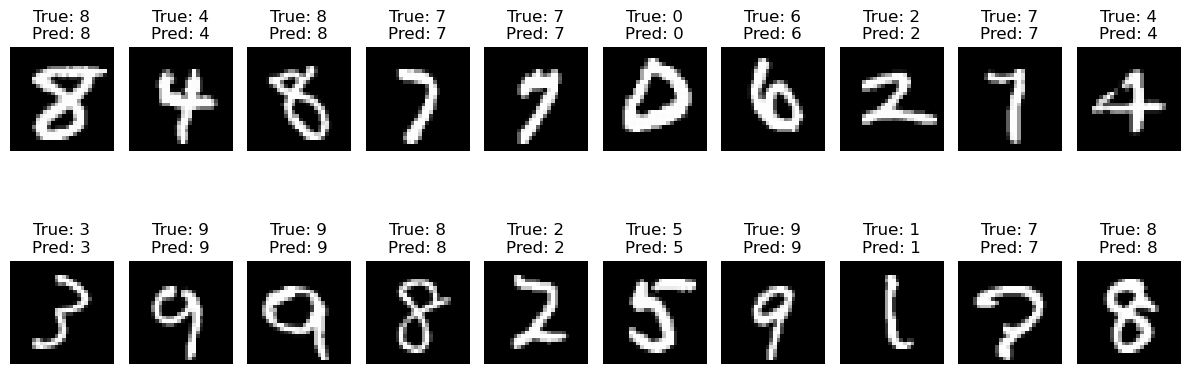

In [19]:
def plot_predictions(X_test, y_test, y_pred, n=20):
    plt.figure(figsize=(12, 5))
    for i in range(n):
        plt.subplot(2, n//2, i+1)
        plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
        plt.title(f"True: {y_test[i]}\nPred: {y_pred[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

plot_predictions(X_test, y_test, y_pred)

Predicted digit: [8]


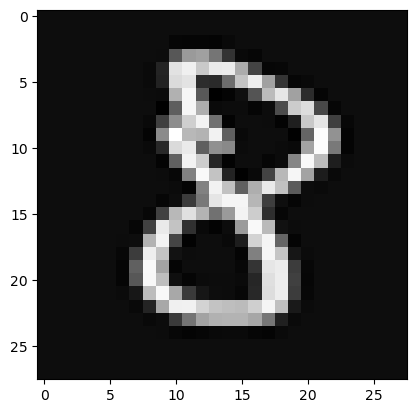

In [20]:
from PIL import Image

def preprocess_image(filepath):
    img = Image.open(filepath).convert('L').resize((28, 28))
    img_arr = np.array(img).astype(np.float32) / 255.0
    return img_arr.flatten().reshape(1, -1)

custom_img2 = preprocess_image('8.png')
custom_pred2 = nn.predict(custom_img2)
print(f"Predicted digit: {custom_pred2}")


plt.imshow(custom_img2.reshape(28,28), cmap='gray')
plt.show()


## 8. Does My Neural Net have any fashion taste?

Let's test it on Fashion MNIST

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train = X_train.reshape(-1, 28*28).astype(np.float32)
X_test = X_test.reshape(-1, 28*28).astype(np.float32)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model = NeuralNetwork(layer_sizes=[784, 128, 10],
                      learning_rate=0.01,
                      n_iterations=50,
                      activation='relu',
                      batch_size=64,
                      lambda_param=0.01,
                      random_state=42)

model.fit(X_train, y_train, verbose=True)

y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"\nTest Accuracy: {acc * 100:.2f}%")


Epoch 0/50, Cost: 0.4514
Epoch 5/50, Cost: 0.3236
Epoch 10/50, Cost: 0.2864
Epoch 15/50, Cost: 0.2544
Epoch 20/50, Cost: 0.2370
Epoch 25/50, Cost: 0.2158
Epoch 30/50, Cost: 0.1984
Epoch 35/50, Cost: 0.1837
Epoch 40/50, Cost: 0.1720
Epoch 45/50, Cost: 0.1659

Test Accuracy: 88.50%


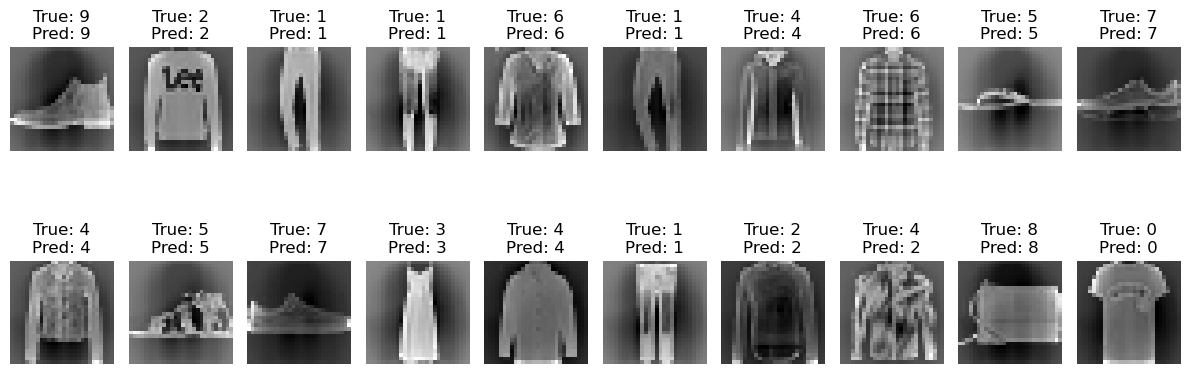

In [25]:
def plot_predictions(X_test, y_test, y_pred, n=20):
    plt.figure(figsize=(12, 5))
    for i in range(n):
        plt.subplot(2, n//2, i+1)
        plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
        plt.title(f"True: {y_test[i]}\nPred: {y_pred[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

plot_predictions(X_test, y_test, y_pred)